# Explore Screen shot technology

The purpose is to get some screenshots going so I can capture text from a target and scrape data that way.

Here are some potential avenues:  

**Pyautogui**  
https://pyautogui.readthedocs.io/en/latest/

Need to enable Python to be able to handle 

In [1]:
import pyautogui

In [3]:
# Setup a pause after each pyautogui call. 
# This can be useful if the program goes awry and you accidentally maken uncontrollable calls. The failsafe is to manually move the mouse to the upper left corner.
pyautogui.PAUSE = 1

## Moving the cursor around

In [5]:
pyautogui.moveTo(100, 100, duration=5)

## Screenshots

image_format:  PNG
trying saving filename:  
fp <class '_io.BytesIO'>
image_format:  JPEG
trying saving filename:  
fp <class '_io.BytesIO'>


ValueError: Could not save to JPEG for display

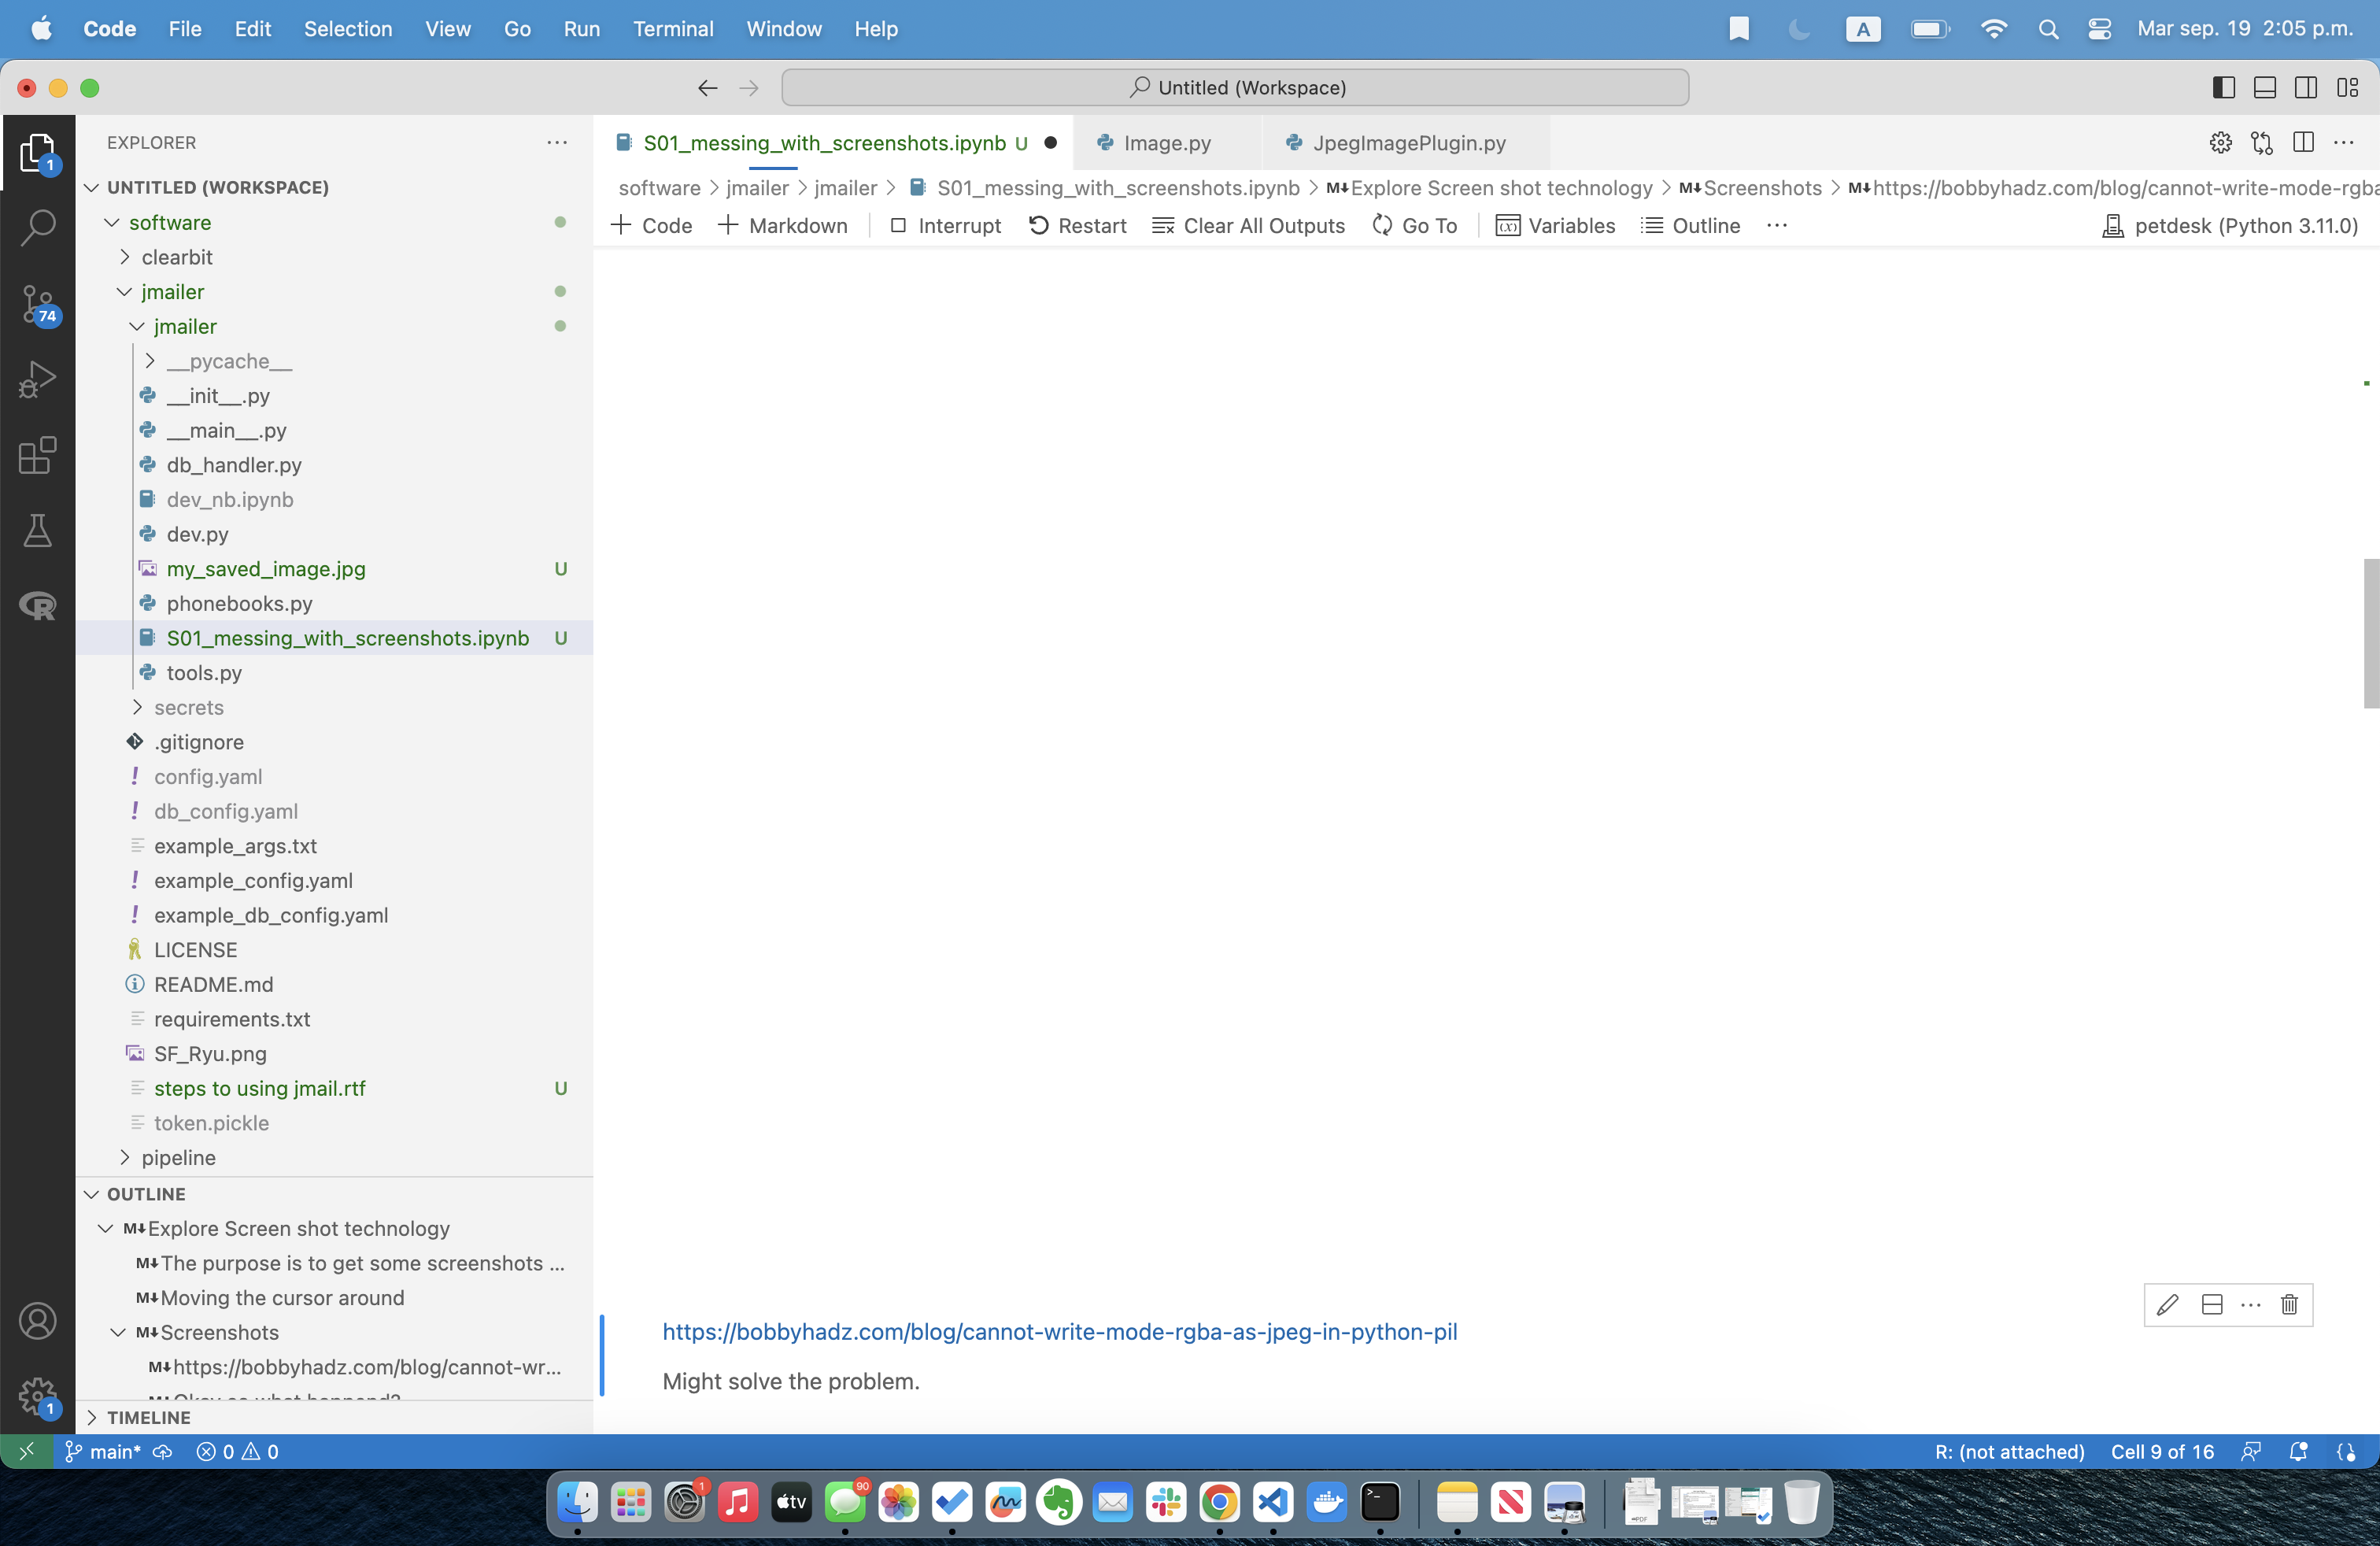

In [1]:
import pyautogui
# pyautogui.screenshot("./my_picture_X10A.png")

pyautogui.screenshot()

# Screen shot problem may be fixed.


https://bobbyhadz.com/blog/cannot-write-mode-rgba-as-jpeg-in-python-pil

Might solve the problem.

Okay so what happend?  

The result is that you were able to save the file after convergting it successfully. 

The question isnow, now do I translate that over to the cunrrent situation above?  

It's essentially the same error!

image_format:  PNG
Trying to mess with this here
image_format:  JPEG
Trying to mess with this here


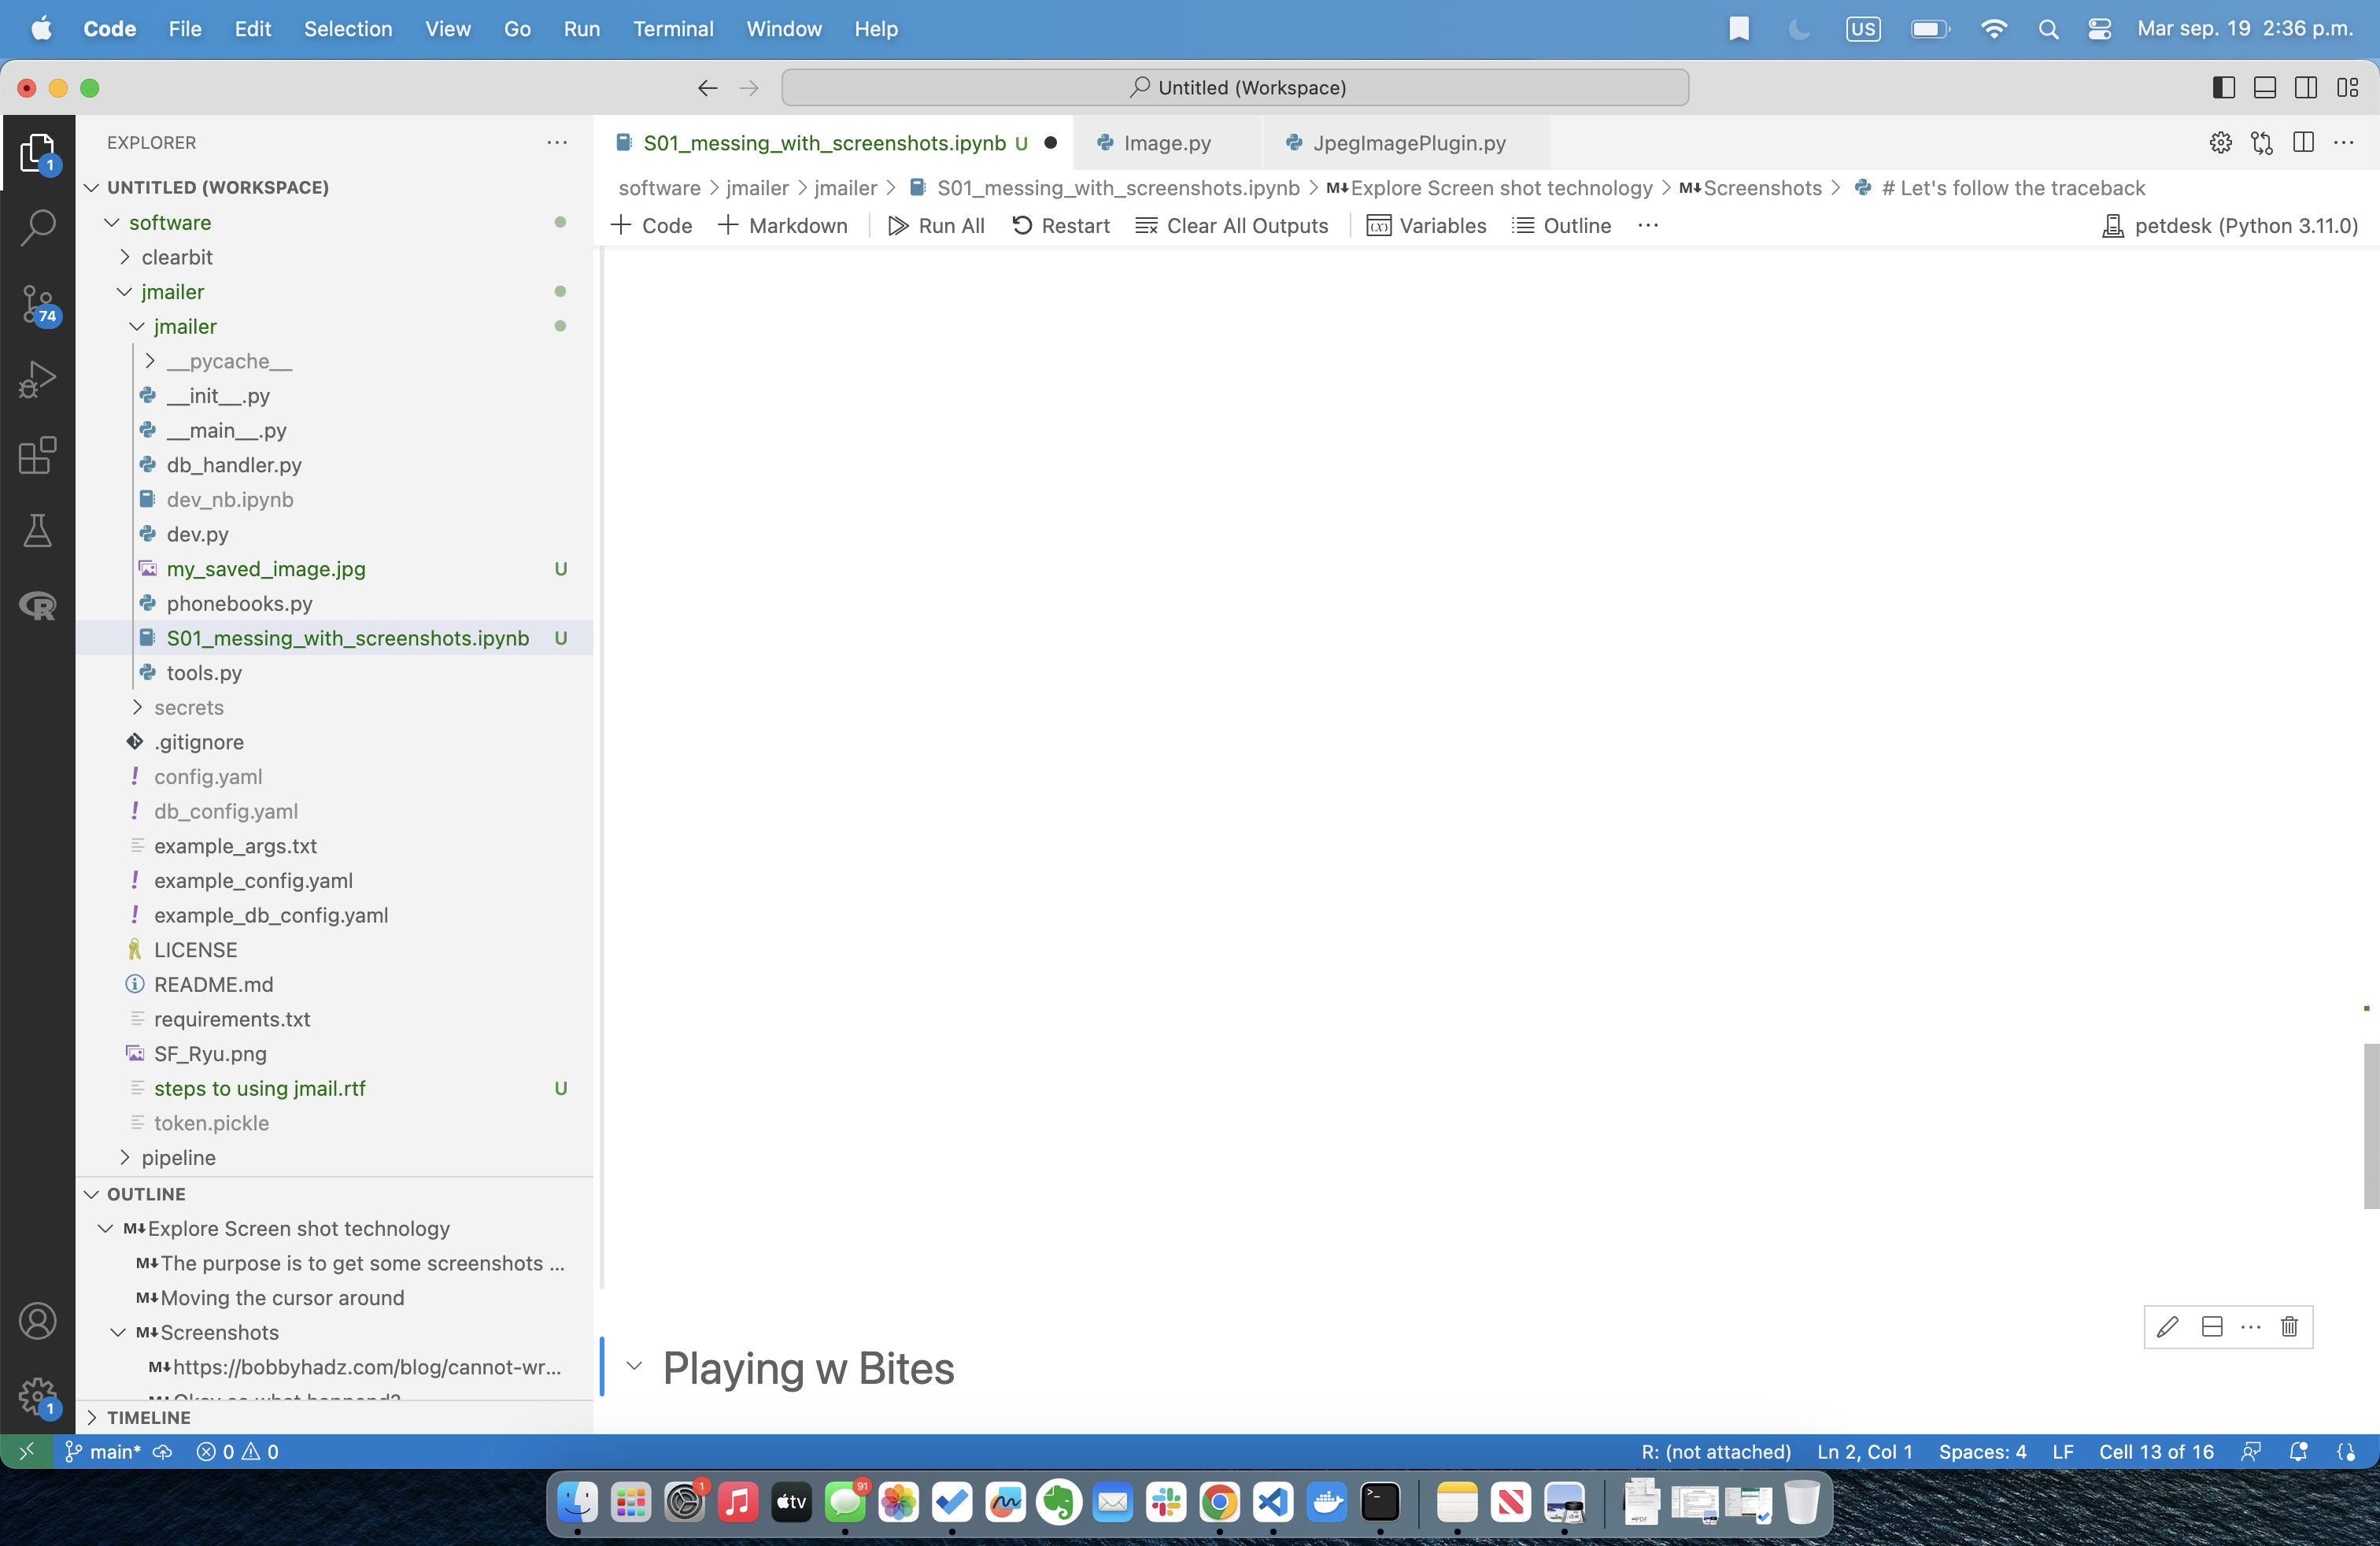

In [2]:
# Let's follow the traceback
import pyautogui


pyautogui.screenshot("")

# Okay now continue Playing w this package

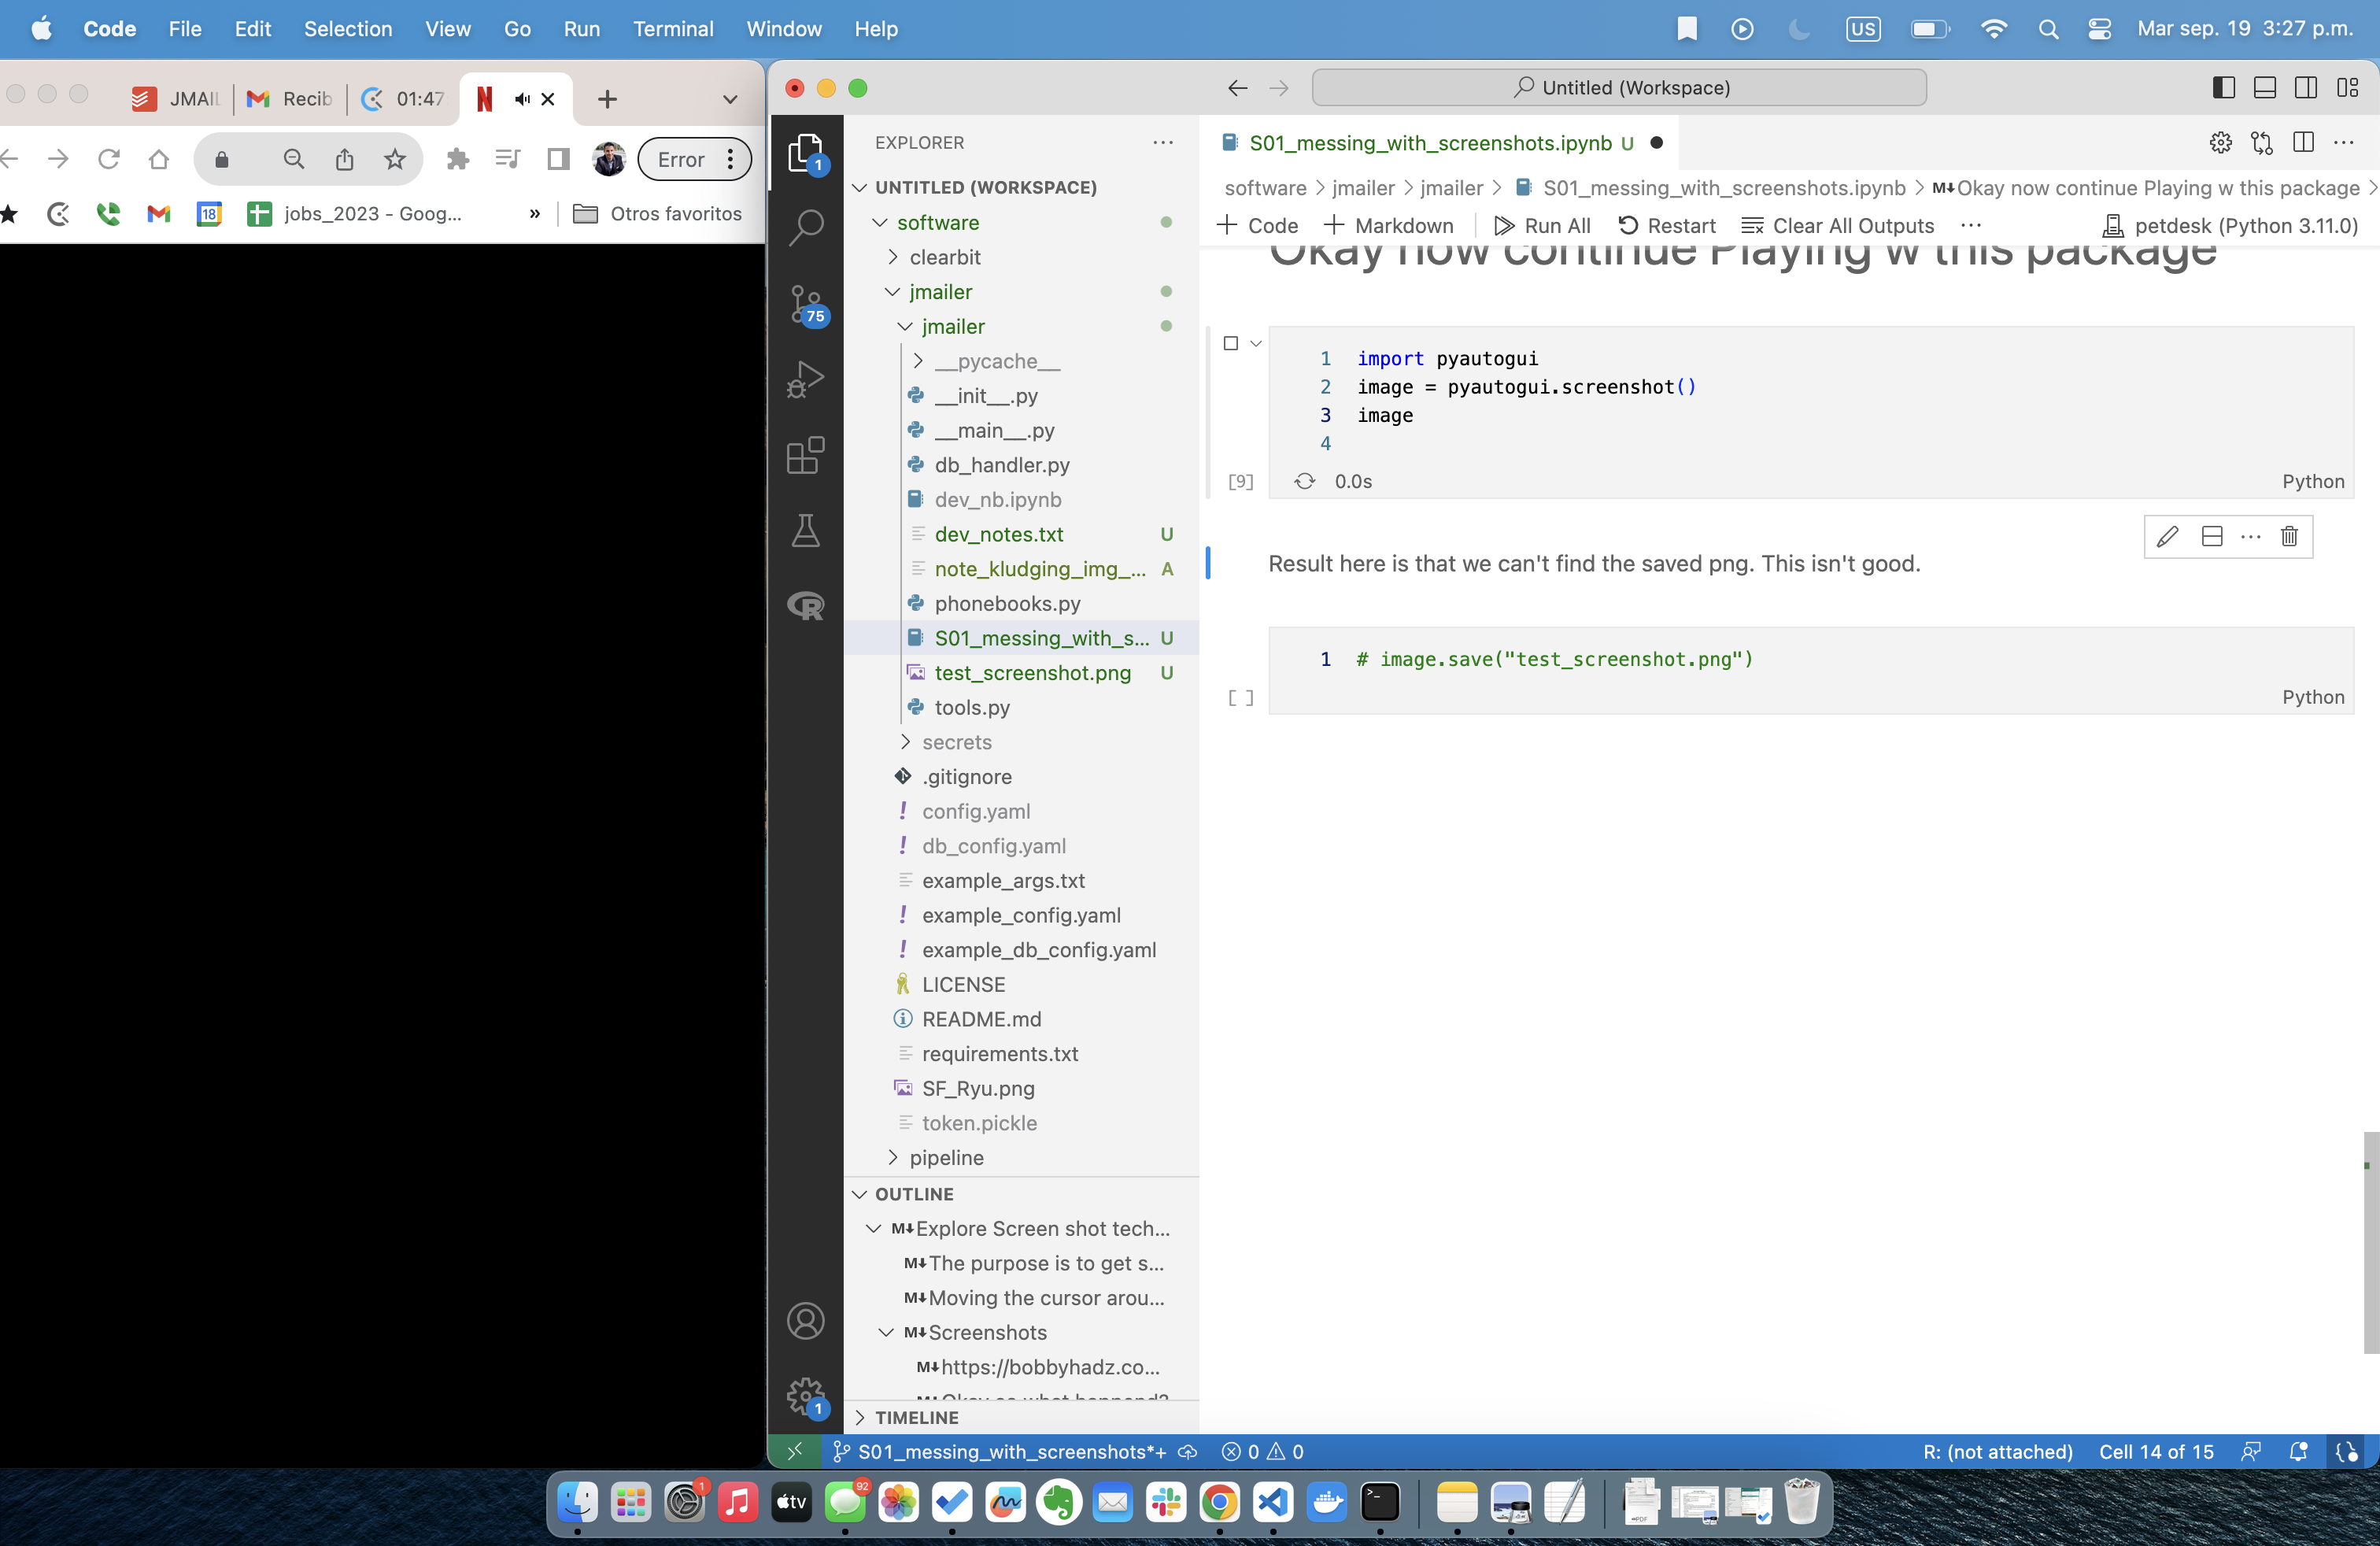

In [9]:
import pyautogui
image = pyautogui.screenshot()
image # this displays it to the screen in a notebook. 


Result here is that we can't find the saved png. This isn't good.

Okay just have to save it...

In [ ]:
image.save("test_screenshot.png")

Try saving some portion of it.  

Notes on finding pixel locations  



In [6]:
3024/1964*1024

1576.6680244399186

In [11]:
import pyautogui


# NOTE: if you go "over" these dimensions, IE you don't match
# the screen dimensions exactly overshoot etc, you will
# stretch the screenshot to fit the dimensions you specified
# so far, What I gather is that the screen is set at 1024...

# guess the right half of the screen.
# 3024 × 1964
left = 500 # 1512
top = 500 # 982
right = 1000 
bottom = 1024
IMAGE_REGION = (left, top, right, bottom) #?

# This is not working.
image = pyautogui.screenshot(region=IMAGE_REGION)
# image = pyautogui.screenshot()

# Image
# FUCKING FIXED IT!
image.save("cropped_2.png") 

# I feel like what it's doing is shit...

# IE it's trying but it's squeezing into such a "tiny region". 

# left, top, right, bottom = bbox


xdisplay
darwin
second bbox


## The screenshot thing doesn't work. Find out what you can do.

Weird, but it looks like a logic if statement is tabbed out of place and not being triggered for later versions of this sware. Why?

let's check that either me or something didn't change the location of this and making the region call basically useless 

YAY I ran the traceback and fixed what was missing! 

Now figure out the full screen size so you can find pixel locations....?

So what I'd like to do is automatically find a screen size and resolution. 

### Playing w Finding NSScreen resolution and all...

In [19]:
from AppKit import NSScreen
print(NSScreen.mainScreen().frame())

screen = NSScreen.mainScreen().frame()
screen.size.height
screen.size.width

<CoreFoundation.CGRect origin=<CoreFoundation.CGPoint x=0.0 y=0.0> size=<CoreFoundation.CGSize width=1512.0 height=982.0>>


1512.0

## Let's put it all together

In [1]:
from AppKit import NSScreen
import pyautogui

screen = NSScreen.mainScreen().frame()
screen_height = int(screen.size.height) # make sure to cast as integers
screen_width = int(screen.size.width)

# Define the screen crop and grab options.
# (left, top, right, bottom)
IMAGE_GRAB_OPTIONS = {
    "WHOLE": (0, 0, screen_width, screen_height),
    "TOP_HALF": (0, 0, screen_width, int(screen_height/2)),
    "RIGHT_HALF": (int(screen_width/2), 0, screen_width, screen_height),
    "BOTTOM_HALF": (0, int(screen_height/2), screen_width, screen_height),
    "LEFT_HALF": (0, 0, int(screen_width/2), screen_height),
    "TOP_LEFT_QUADRANT": (0, 0, int(screen_width/2), int(screen_height/2)),
    "TOP_RIGHT_QUADRANT": (int(screen_width/2), 0, screen_width, int(screen_height/2)),
    "BOTTOM_RIGHT_QUADRANT": (int(screen_width/2), int(screen_height/2), screen_width, screen_height),
    "BOTTOM_LEFT_QUADRANT": (0, int(screen_height/2), int(screen_width/2), screen_height),
    "CUSTOM": None,
}


# TESTING 
# choose an option
# if image_grap_opt == ""
# just do a selection scheme
image_grap_opt = "CUSTOM"
region = (700, 500, 1200, 900)


# Screen crop and grab and save.
image_region = IMAGE_GRAB_OPTIONS[image_grap_opt]

# in this then for the custom one, provide the tuple
if image_grap_opt == "CUSTOM":
    image_region = region

image = pyautogui.screenshot(region=image_region)
image.save("cropped_test_" + f"{image_grap_opt}_" + ".png")


In [3]:
type(image)

PIL.Image.Image

Now that you have this built, what's the next move? How will you package this nicely?  

Think of the main idea. It's that you need to grab an image. Save it somewhere nice and accessible.  

So I should build a screen picture package in tools that does this this work.  

One thing I may like to have is to build it with a tear-down process? You just did this recently. How will you do this here?

# Developing the Screenshot class

In [26]:
class ScreenShot():
    """A class for handling screen shots."""
    import os
    from AppKit import NSScreen
    import pyautogui


    def __init__(self, height=None, width=None):
        """
        Constructor to initialize a screenshot grab with the default screen size. 
        Provided values are cast as integers. 
        Defines the image grab options.

        Parameters
        -------
        height (float): Float of screen height.
        width (float): Float of screen width.

        Returns
        -------
        (none)
        """
        self.screen = NSScreen.mainScreen().frame()
        if height is None:
            self.creen_height = int(screen.size.height) 
        else:
            self.screen_height = int(height)
        
        if width is None:
            self.screen_width = int(screen.size.width)
        else:
            self.screen_width = int(width)

        # Define the screen crop and grab options.
        # (left, top, right, bottom)
        self.image_grab_options = {
            "WHOLE": (0, 0, screen_width, screen_height),
            "TOP_HALF": (0, 0, screen_width, int(screen_height/2)),
            "RIGHT_HALF": (int(screen_width/2), 0, screen_width, screen_height),
            "BOTTOM_HALF": (0, int(screen_height/2), screen_width, screen_height),
            "LEFT_HALF": (0, 0, int(screen_width/2), screen_height),
            "TOP_LEFT_QUADRANT": (0, 0, int(screen_width/2), int(screen_height/2)),
            "TOP_RIGHT_QUADRANT": (int(screen_width/2), 0, screen_width, int(screen_height/2)),
            "BOTTOM_RIGHT_QUADRANT": (int(screen_width/2), int(screen_height/2), screen_width, screen_height),
            "BOTTOM_LEFT_QUADRANT": (0, int(screen_height/2), int(screen_width/2), screen_height),
            "CUSTOM": None,
        }
        return
    

    def snapshot(self, image_grap_opt="WHOLE", save_name=None, region=None):
        """
        Take a screenshot. Optionally save it with the given name. Can specify what regions of the screen to snapshot.
        Backed by pyautogui and PIL. Assume save_name has the extension attached.

        Parameters
        -------
        image_grap_opt (str): Image option to choose: WHOLE, TOP_HALF, RIGHT_HALF, BOTTOM_HALF, LEFT_HALF, TOP_LEFT_QUADRANT, TOP_RIGHT_QUADRANT, BOTTOM_RIGHT_QUADRANT, BOTTOM_LEFT_QUADRANT or CUSTOM.
        save_name (str): Filepath to save captured image as.
        region (tup): Tuple of region to capture: (left, top, right, bottom).

        Returns
        -------
        image (PIL.Image.Image): PIL image object of screen capture.
        """
        image_region = self.image_grab_options[image_grap_opt]

        if image_grap_opt == "CUSTOM":
            image_region = region

        image = pyautogui.screenshot(region=image_region)

        if not save_name is None:
            filename, file_extension = self.os.path.splitext(save_name)
            if file_extension is None:
                image.save(filename + ".png")
            else:
                image.save(save_name)
        return image



In [27]:
sc = ScreenShot()

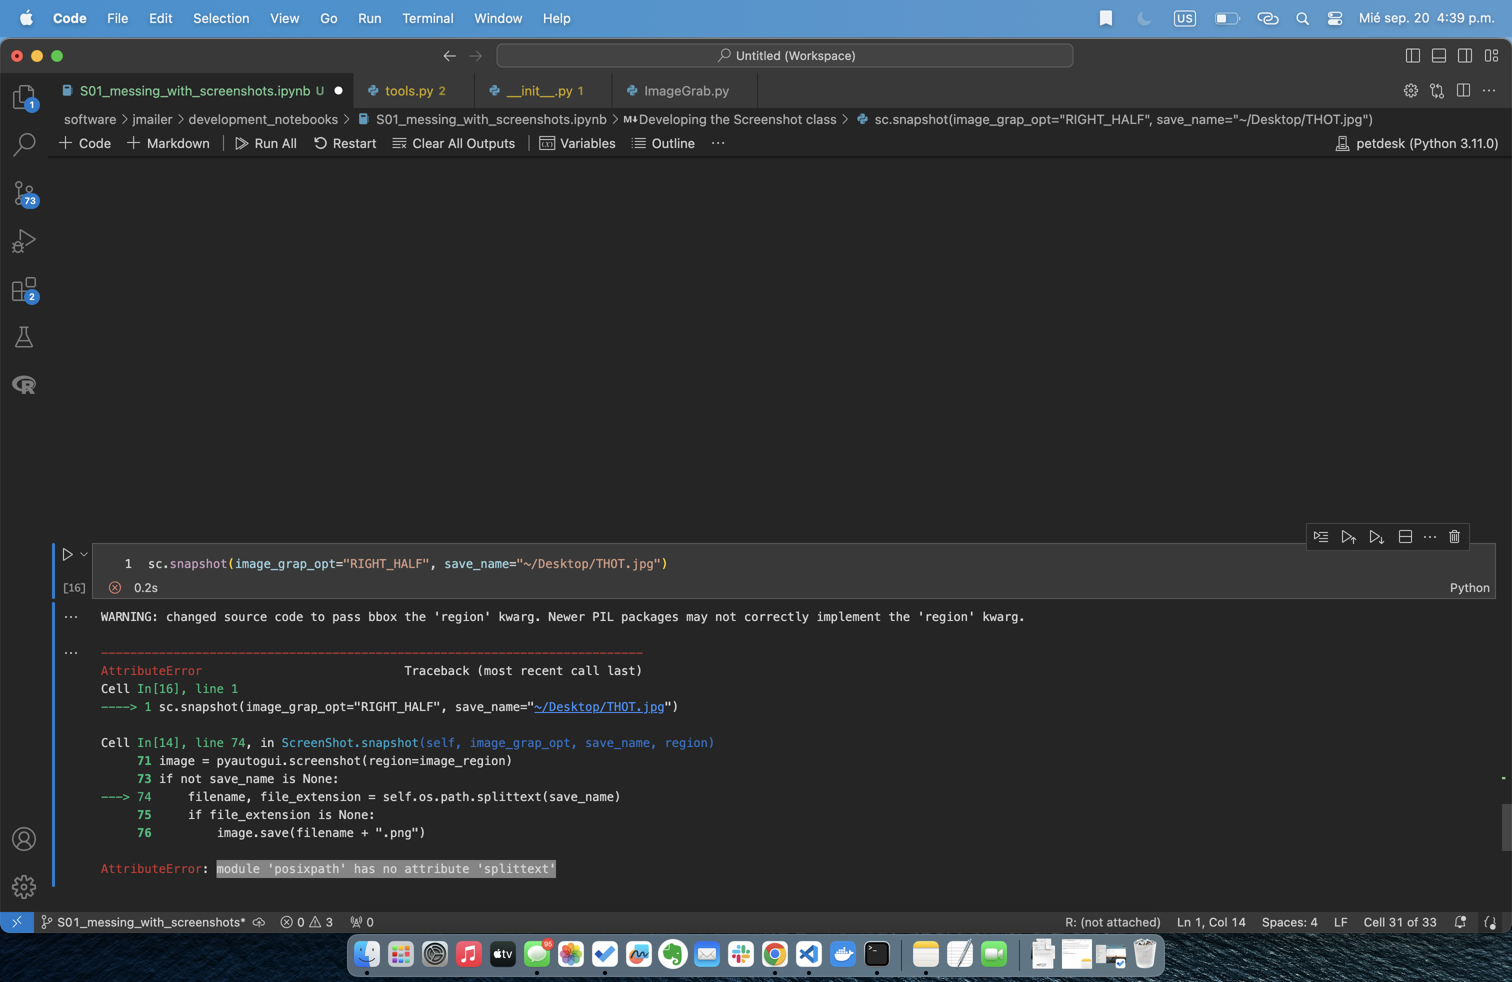

In [20]:
sc.snapshot()

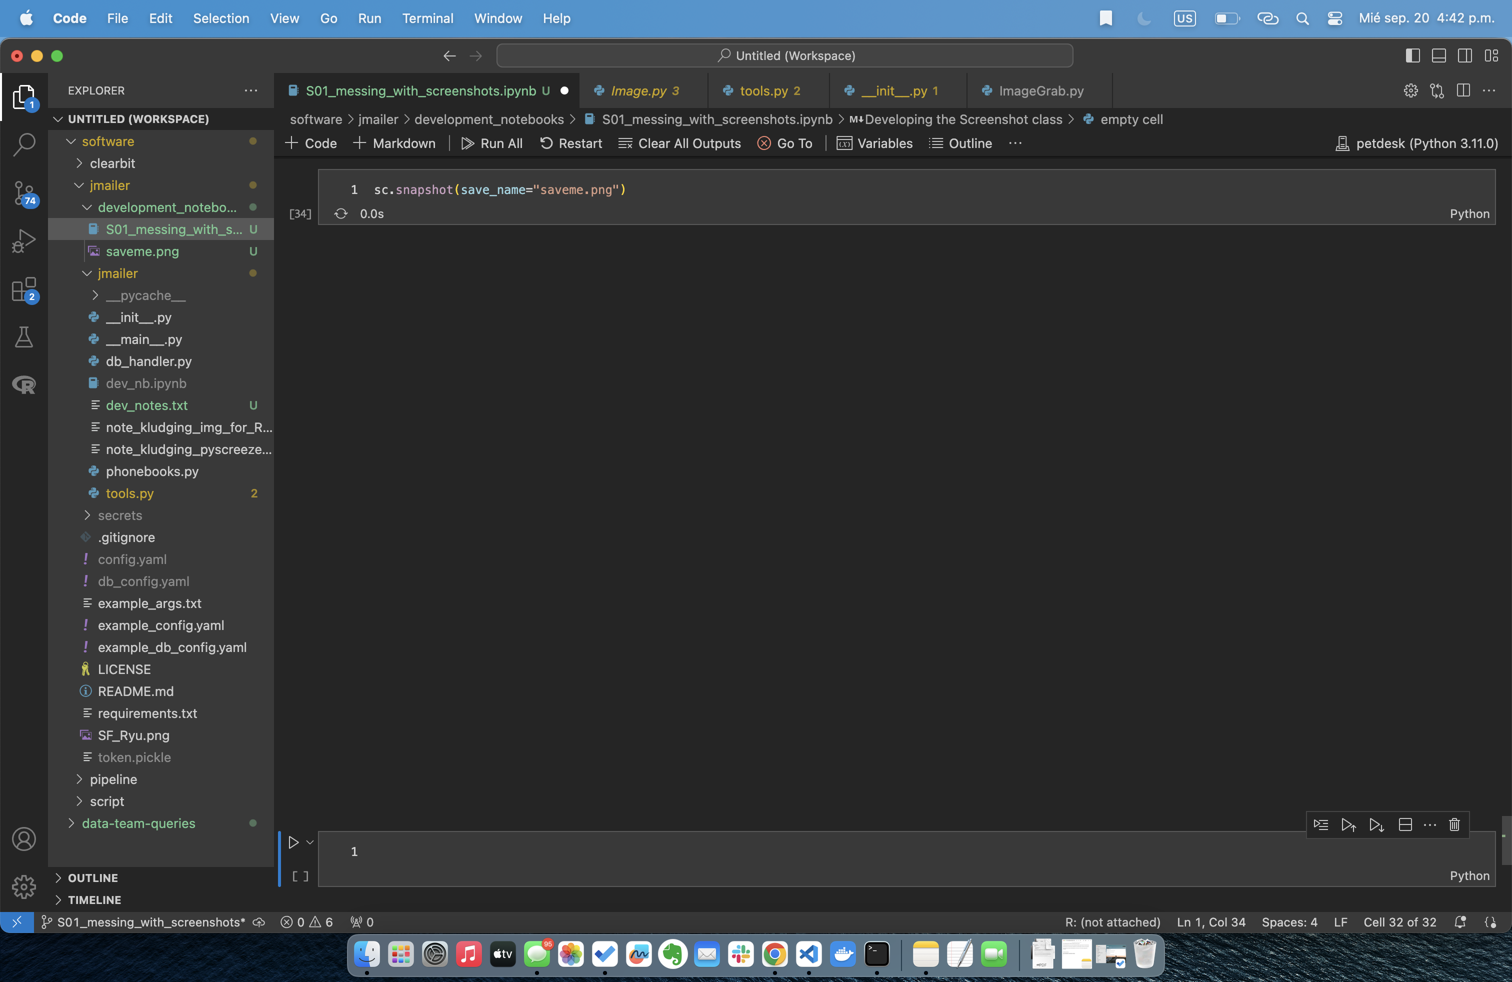

In [34]:
sc.snapshot(save_name="saveme.png")

NOTES for tomorrow:  

come back and refine this save feature!